In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor





 **2**.**Load** **Dataset**

In [6]:

df=pd.read_csv("Train.csv")
df.shape

(10999, 12)

In [7]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**3**.**Basic** **Data** **Information**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


In [10]:
df.nunique()

,0
ID,10999
Warehouse_block,5
Mode_of_Shipment,3
Customer_care_calls,6
Customer_rating,5
Cost_of_the_Product,215
Prior_purchases,8
Product_importance,3
Gender,2
Discount_offered,65


**4**.**Data** **Preprocessing**

In [11]:
df=df.drop(columns=['ID','Gender','Customer_rating'])


In [12]:
#Assume last columns is target
target_col=df.columns[-1]
print(f"\n Target column: {target_col}")



 Target column: Reached.on.Time_Y.N


In [13]:
X= df.drop(columns=[target_col])
y=df[target_col]

In [14]:
# Drop ID like coloumn if present
if "ID" in X.columns:
  X=X.drop(columns=["ID"])

In [15]:
num_cols=X.select_dtypes(include=np.number).columns.tolist()
cat_cols=X.select_dtypes(include=["object","category","bool"]).columns.tolist()

print(f"\n Numerical Columns: {num_cols}")
print(f"\n Categorical Columns: {cat_cols}")


 Numerical Columns: ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

 Categorical Columns: ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


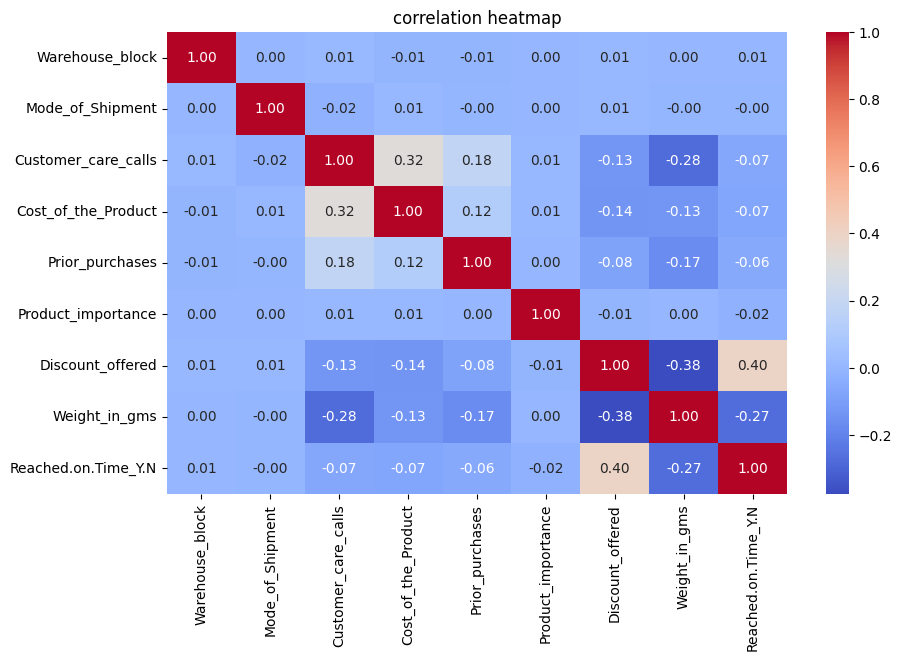

In [16]:
df_encoded=df.copy()
for col in['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']:
  df_encoded[col]=df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()

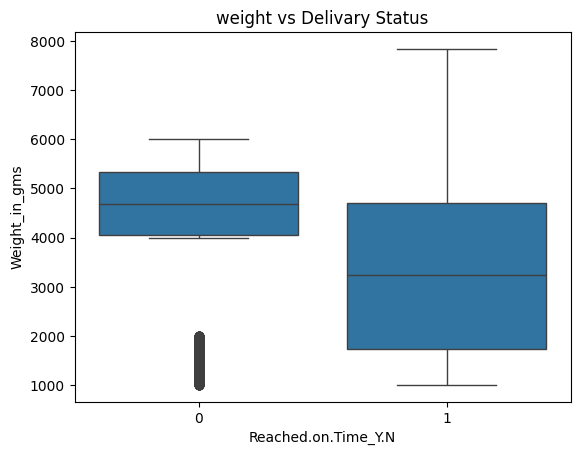

In [17]:
sns.boxplot(x='Reached.on.Time_Y.N',y='Weight_in_gms',data=df)
plt.title("weight vs Delivary Status")
plt.show()

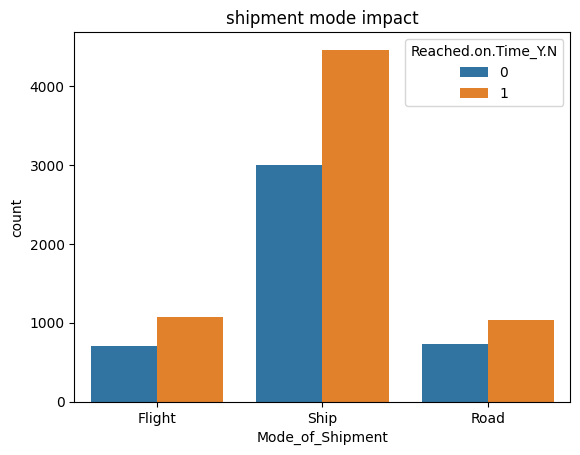

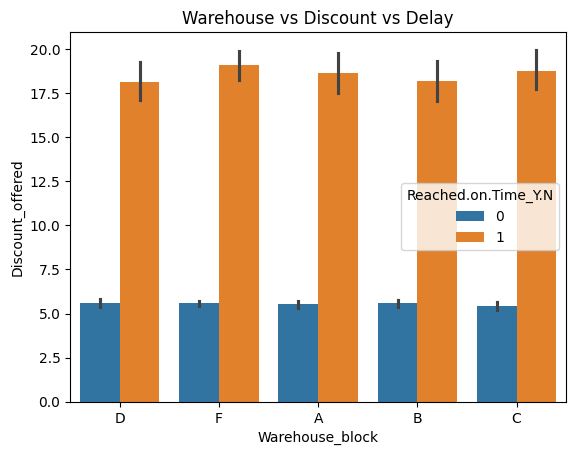

In [18]:
sns.countplot(x='Mode_of_Shipment',hue='Reached.on.Time_Y.N',data=df)
plt.title("shipment mode impact")
plt.show()

sns.barplot(x='Warehouse_block',y='Discount_offered',hue='Reached.on.Time_Y.N',data=df)
plt.title("Warehouse vs Discount vs Delay")
plt.show()

**Feature** **engineering**

In [19]:
df['Discount_to_cost_Ratio']=df['Discount_offered']/(df['Cost_of_the_Product']+1)
df['Weight_to_Discount']=df['Weight_in_gms']/(df['Discount_offered']+1)

**5**.**Preprocessing**

In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

X=df.drop(columns=['Reached.on.Time_Y.N'])
y=df['Reached.on.Time_Y.N']

for col in ['Warehouse_block','Mode_of_Shipment','Product_importance']:
  X[col]=LabelEncoder().fit_transform(X[col])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X_train,y_train)

print("Before SMOTE:",y_train.value_counts())
print("After SMOTE:",y_res.value_counts())

Before SMOTE: Reached.on.Time_Y.N
1    5258
0    3541
Name: count, dtype: int64
After SMOTE: Reached.on.Time_Y.N
0    5258
1    5258
Name: count, dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder
cat_cols=['Warehouse_block','Mode_of_Shipment','Product_importance']
for col in cat_cols:
  le=LabelEncoder()
  X[col]=le.fit_transform(X[col])

In [34]:
numeric_transformer=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("scaler",StandardScaler())
])
categorical_transform=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("onehot",OneHotEncoder(handle_unknown="ignore"))
])
preprocessor=ColumnTransformer([
    ("num",numeric_transformer,num_cols),
    ("cat",categorical_transform,cat_cols)
])

**6**.**Detect** **Task** **Type**

In [35]:
# DETECTING TYPE (CLASSIFICATION OR REGRESSION
unique_vals=y.nunique()
is_classification=True if unique_vals<=20 else False
task_type="classification" if is_classification else "regression"
print(task_type.upper())

CLASSIFICATION


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)


(8799, 10)
(2200, 10)


**8**.**Model** **Training**

In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model=XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("XGBoost Accuracy:",accuracy_score(y_test,y_pred))

XGBoost Accuracy: 0.6709090909090909


In [38]:
#logistic Regression
log_reg_model=Pipeline([
    ("pre",preprocessor),
    ("clf",LogisticRegression(max_iter=1000))
])
log_reg_model.fit(X_train,y_train)
y_pred=log_reg_model.predict(X_test)
print("logistic regression result")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

logistic regression result
Accuracy: 0.6445454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200

Confusion Matrix:
 [[499 396]
 [386 919]]


In [39]:
# Random Forest
rf_model=Pipeline([
    ("pre",preprocessor),
    ("clf",RandomForestClassifier(n_estimators=200,random_state=42))
 ])
rf_model.fit(X_train,y_train)
y_pred_rf=rf_model.predict(X_test)

print("Random forest Results:")
print("Accuracy:", accuracy_score(y_test,y_pred_rf))
print("classification Report:\n",classification_report(y_test,y_pred_rf))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_rf))



Random forest Results:
Accuracy: 0.6627272727272727
classification Report:
               precision    recall  f1-score   support

           0       0.57      0.66      0.62       895
           1       0.74      0.66      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.66      2200
weighted avg       0.67      0.66      0.67      2200

confusion matrix:
 [[595 300]
 [442 863]]


In [40]:
# Train Gradient Boosting
gb_model=Pipeline([
    ("pre",preprocessor),
    ("clf",GradientBoostingClassifier(random_state=42))
])
gb_model.fit(X_train,y_train)
y_pred_gb=gb_model.predict(X_test)

print("Gradient boosting Results:")
print("Accuracy:",accuracy_score(y_test,y_pred_gb))
print("classification:",classification_report(y_test,y_pred_gb))
print("confusion matrix:",confusion_matrix(y_test,y_pred_gb))


Gradient boosting Results:
Accuracy: 0.6840909090909091
classification:               precision    recall  f1-score   support

           0       0.57      0.87      0.69       895
           1       0.86      0.56      0.68      1305

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.74      0.68      0.68      2200

confusion matrix: [[778 117]
 [578 727]]


In [41]:
# SVC
svc_model=Pipeline([
    ("pre",preprocessor),
    ("clf",SVC(probability=True))
])
svc_model.fit(X_train,y_train)
y_pred_svc=svc_model.predict(X_test)

print("SVC results:")
print("Accuracy:",accuracy_score(y_test,y_pred_svc))
print("classification Report:\n",classification_report(y_test,y_pred_svc))
print("confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))

SVC results:
Accuracy: 0.6690909090909091
classification Report:
               precision    recall  f1-score   support

           0       0.56      0.88      0.68       895
           1       0.86      0.53      0.65      1305

    accuracy                           0.67      2200
   macro avg       0.71      0.70      0.67      2200
weighted avg       0.74      0.67      0.67      2200

confusion Matrix:
 [[785 110]
 [618 687]]


In [42]:
# KNN
knn_model=Pipeline([
    ("pre",preprocessor),
    ("clf",KNeighborsClassifier())
])
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)

print("KNN results:")
print("Accuracy:",accuracy_score(y_test,y_pred_knn))
print("classification Report:\n",classification_report(y_test,y_pred_knn))
print("confusion matrix:\n",confusion_matrix(y_test,y_pred_knn))

KNN results:
Accuracy: 0.64
classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.58       895
           1       0.71      0.67      0.69      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.65      0.64      0.64      2200

confusion matrix:
 [[538 357]
 [435 870]]


In [43]:
print("\n--- Summary ---")
print("Logistic Regression:", accuracy_score(y_test, y_pred))
print("Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Gradient Boosting:", accuracy_score(y_test, y_pred_gb))
print("SVC:", accuracy_score(y_test, y_pred_svc))
print("KNN:", accuracy_score(y_test, y_pred_knn))



--- Summary ---
Logistic Regression: 0.6445454545454545
Random Forest: 0.6627272727272727
Gradient Boosting: 0.6840909090909091
SVC: 0.6690909090909091
KNN: 0.64


In [44]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split features and target
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing: encode categorical + scale numeric
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Model pipeline
model = Pipeline([
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧾 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Accuracy: 0.6518181818181819

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.66      0.61       895
           1       0.74      0.64      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.65      0.65      0.65      2200
weighted avg       0.66      0.65      0.65      2200


🧾 Confusion Matrix:
 [[594 301]
 [465 840]]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", clf)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Logistic Regression Accuracy: 0.6386
Random Forest Accuracy: 0.6518
Gradient Boosting Accuracy: 0.6827
Logistic Regression Accuracy: 0.6386
Random Forest Accuracy: 0.6518
Gradient Boosting Accuracy: 0.6827


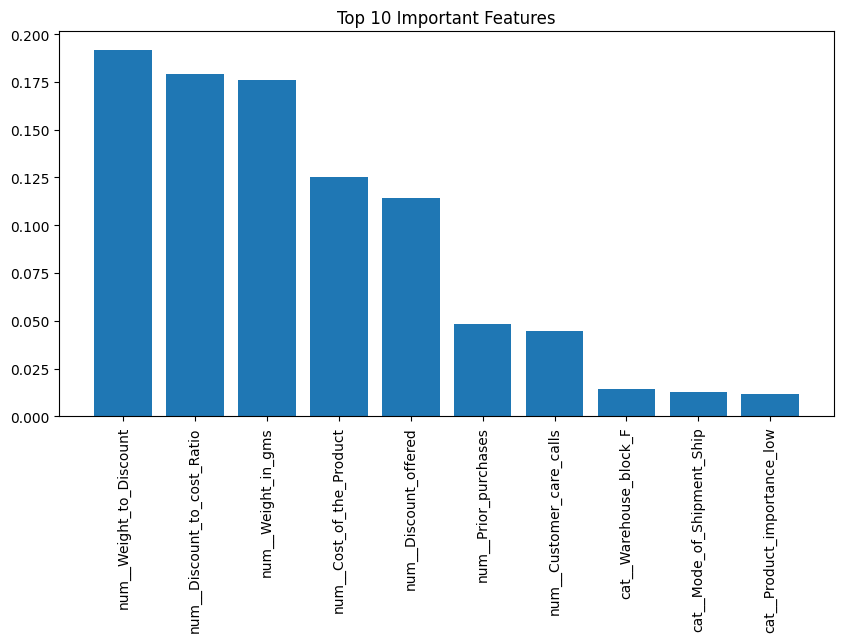

In [46]:
import matplotlib.pyplot as plt
import numpy as np

rf = model.named_steps['clf']
feature_names = model.named_steps['pre'].get_feature_names_out()
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), feature_names[indices[:10]], rotation=90)
plt.title("Top 10 Important Features")
plt.show()


In [78]:
df['Discount_percent'] = df['Discount_offered'] / df['Cost_of_the_Product']
df['Cost_per_gram'] = df['Cost_of_the_Product'] / df['Weight_in_gms']
df['Weight_to_Discount'] = df['Weight_in_gms'] / (df['Discount_offered'] + 1)
df['Discount_to_Cost_Ratio'] = df['Discount_offered'] / (df['Cost_of_the_Product'] + 1)
df['Total_customer_interaction'] = df['Customer_care_calls'] + df['Prior_purchases']

# Split features and target after feature engineering
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']


In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# Create a preprocessor to handle categorical and numerical features
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

# Apply SMOTE to the processed data
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_processed, y)

In [81]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train the model using the resampled training data
xgb.fit(X_train_res, y_train_res)

# Predict on the resampled test data
y_pred = xgb.predict(X_test_res)

print("Accuracy:", accuracy_score(y_test_res, y_pred))
print(classification_report(y_test_res, y_pred))
print(confusion_matrix(y_test_res, y_pred))

Accuracy: 0.7227722772277227
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1313
           1       0.83      0.56      0.67      1313

    accuracy                           0.72      2626
   macro avg       0.75      0.72      0.72      2626
weighted avg       0.75      0.72      0.72      2626

[[1161  152]
 [ 576  737]]


In [82]:
from sklearn.model_selection import cross_val_score
# Apply the preprocessor to X
X_processed = preprocessor.transform(X)
scores = cross_val_score(xgb, X_processed, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", scores.mean())

Cross-validation Accuracy: 0.6017666708007772


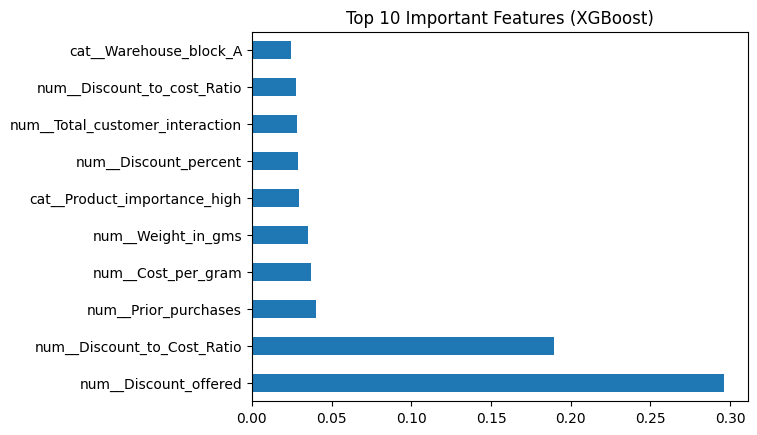

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

importance = pd.Series(xgb.feature_importances_, index=feature_names)
importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

search = RandomizedSearchCV(xgb, params, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
search.fit(X_train_res, y_train_res)
print("Best Parameters:", search.best_params_)

Best Parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


**GOAL**: UNDERSTANDING WHY DELIVARIES ARE LATE


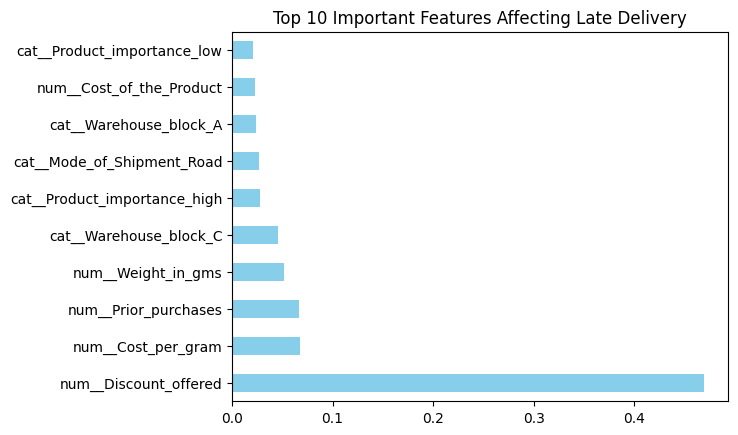

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the best estimator from the randomized search
best_xgb = search.best_estimator_

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

importance = pd.Series(best_xgb.feature_importances_, index=feature_names)
importance.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features Affecting Late Delivery")
plt.show()

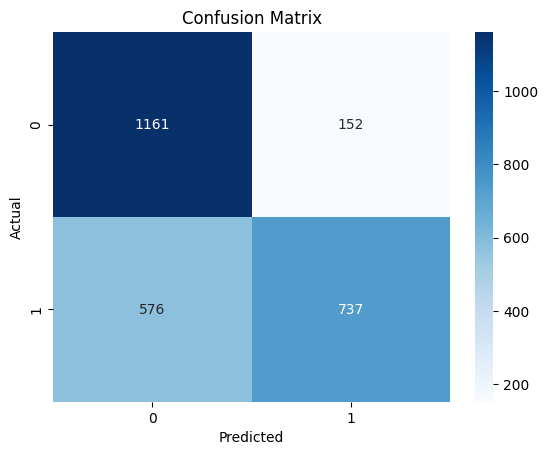

In [73]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_res, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

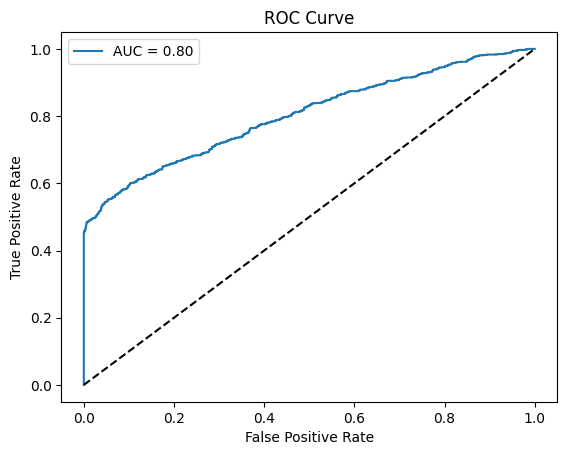

In [85]:
from sklearn.metrics import roc_curve, auc

# Apply the preprocessor to X_test
# Refit preprocessor on the DataFrame with new features
X_processed = preprocessor.fit_transform(X)
X_test_processed = preprocessor.transform(X_test)

# Get predicted probabilities for the positive class
y_pred_prob = best_xgb.predict_proba(X_test_processed)[:, 1]

# Calculate ROC curve and AUC on the original test set
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Plot random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()